In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_csv("threshold_df.csv")

In [56]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot
from lingam.utils import make_prior_knowledge
print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])
np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)


['1.26.4', '2.2.2', '0.20.1', '1.8.3']


In [57]:
df

,Unnamed: 0,Document,Topic,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,label
0,2,music recommendation look expand playlist usua...,1,0.344423,0.452537,0.054074,0.114726,0.020295,0.013946,0
1,4,worry year old girl subject domestic physicalm...,0,0.858371,0.010378,0.038489,0.047077,0.025859,0.019826,1
2,5,hey rredflag sure right place post currently s...,3,0.428091,0.017101,0.047257,0.449367,0.036978,0.021206,1
3,8,feel good set dateim kill friday nice finally ...,0,0.814063,0.012562,0.057671,0.060455,0.029089,0.026160,1
4,10,excercise motivate ngl wait shape know overnig...,0,0.838297,0.010949,0.041868,0.052741,0.026385,0.029760,0
...,...,...,...,...,...,...,...,...,...,...
12113,25730,wanna dieim shitty feel shitty time constantly...,0,0.801660,0.011913,0.059901,0.058902,0.044851,0.022772,1
12114,25731,sleep stay awake night decide stay day fix sle...,0,0.891070,0.008040,0.038503,0.033579,0.015013,0.013796,0
12115,25732,school guess coop goat farm quad today day wee...,0,0.708307,0.016568,0.059237,0.094762,0.063505,0.057622,0
12116,25736,dog think ill kill myselfthe thing hold yup ap...,0,0.766298,0.016600,0.087554,0.067326,0.035604,0.026619,1


In [58]:

def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine='dot')
    names = labels if labels else [f'x[1]' for i in range(len(adjacency_matrix))]
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=f'{coef:.2f}')
    return d

In [59]:
df = df.drop(["Unnamed: 0"], axis=1)

In [60]:
df.head()

,Document,Topic,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,label
0,music recommendation look expand playlist usua...,1,0.344423,0.452537,0.054074,0.114726,0.020295,0.013946,0
1,worry year old girl subject domestic physicalm...,0,0.858371,0.010378,0.038489,0.047077,0.025859,0.019826,1
2,hey rredflag sure right place post currently s...,3,0.428091,0.017101,0.047257,0.449367,0.036978,0.021206,1
3,feel good set dateim kill friday nice finally ...,0,0.814063,0.012562,0.057671,0.060455,0.029089,0.026160,1
4,excercise motivate ngl wait shape know overnig...,0,0.838297,0.010949,0.041868,0.052741,0.026385,0.029760,0


In [61]:
pd.options.display.float_format = '{:.6f}'.format

In [62]:
df = df.drop(['Topic'], axis=1)

In [63]:
df_analysis = df.drop(['Document'], axis=1)

In [64]:
df_analysis.info

<bound method DataFrame.info of        Topic_0  Topic_1  Topic_2  Topic_3  Topic_4  Topic_5  label
0     0.344423 0.452537 0.054074 0.114726 0.020295 0.013946      0
1     0.858371 0.010378 0.038489 0.047077 0.025859 0.019826      1
2     0.428091 0.017101 0.047257 0.449367 0.036978 0.021206      1
3     0.814063 0.012562 0.057671 0.060455 0.029089 0.026160      1
4     0.838297 0.010949 0.041868 0.052741 0.026385 0.029760      0
...        ...      ...      ...      ...      ...      ...    ...
12113 0.801660 0.011913 0.059901 0.058902 0.044851 0.022772      1
12114 0.891070 0.008040 0.038503 0.033579 0.015013 0.013796      0
12115 0.708307 0.016568 0.059237 0.094762 0.063505 0.057622      0
12116 0.766298 0.016600 0.087554 0.067326 0.035604 0.026619      1
12117 1.000000 0.000000 0.000000 0.000000 0.000000 0.000000      0

[12118 rows x 7 columns]>

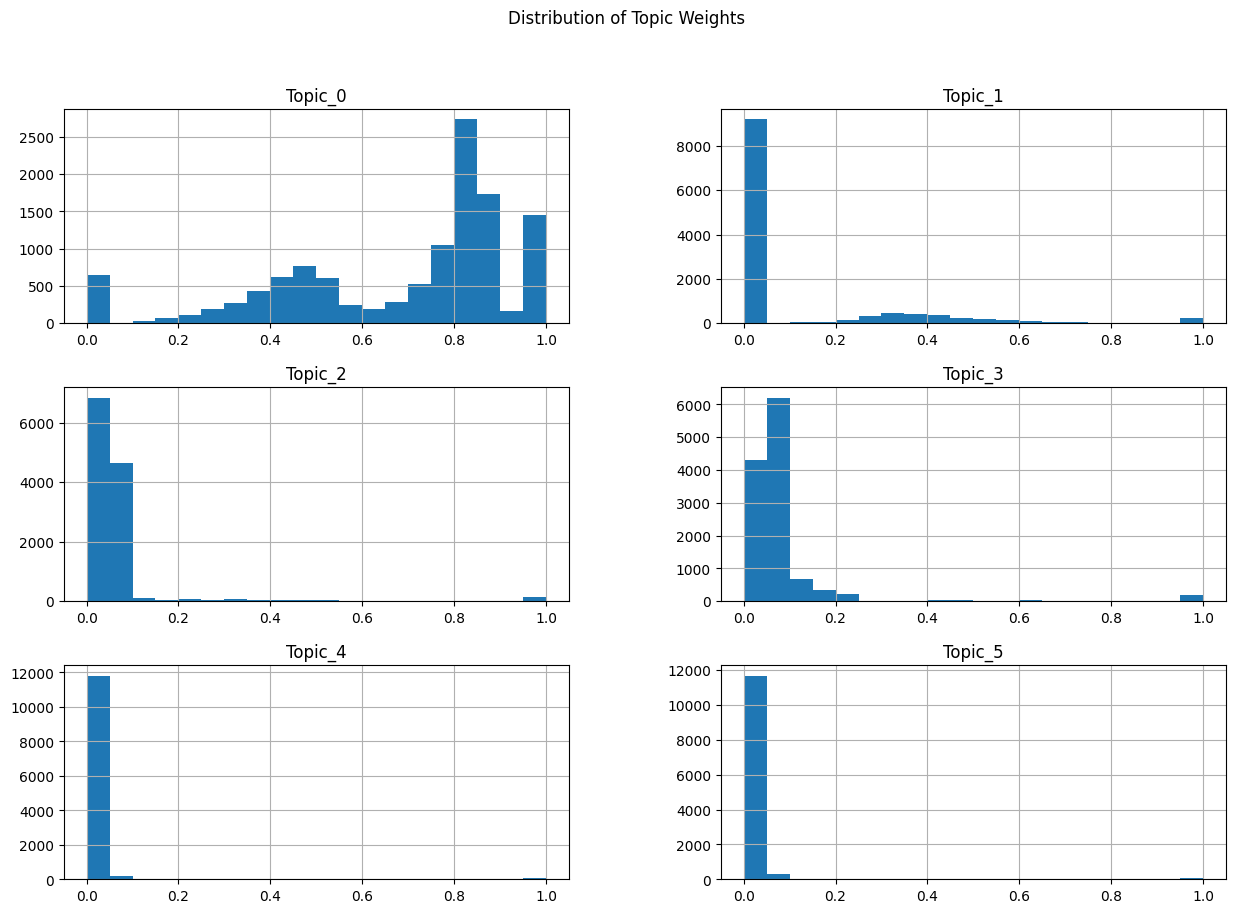

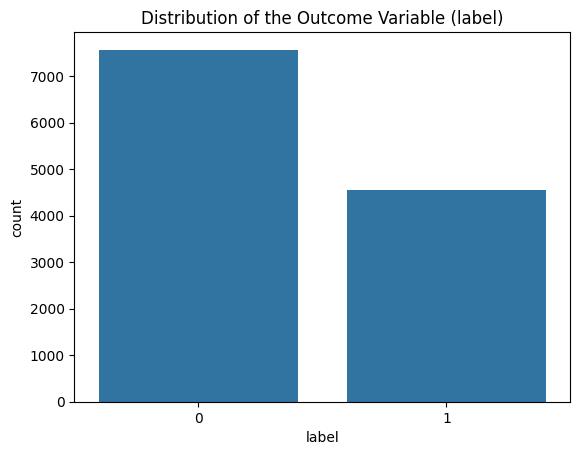

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of each topic weight
df_analysis.drop(columns=['label']).hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Topic Weights')
plt.show()

# Plot the distribution of the outcome variable
sns.countplot(x='label', data=df_analysis)
plt.title('Distribution of the Outcome Variable (label)')
plt.show()


In [66]:
pk = make_prior_knowledge(n_variables=len(df_analysis.columns),
sink_variables=[6])

In [67]:
model = lingam.DirectLiNGAM(prior_knowledge=pk)
model.fit(df_analysis)
labels = [f'[1]. {col}' for i, col in enumerate(df_analysis.columns)]
print(labels)
dot = make_graph(model.adjacency_matrix_, labels)
print(dot)

['[1]. Topic_0', '[1]. Topic_1', '[1]. Topic_2', '[1]. Topic_3', '[1]. Topic_4', '[1]. Topic_5', '[1]. label']
digraph {
	"[1]. Topic_2" -> "[1]. Topic_0" [label=-0.80]
	"[1]. Topic_3" -> "[1]. Topic_0" [label=-0.85]
	"[1]. Topic_4" -> "[1]. Topic_0" [label=-0.74]
	"[1]. Topic_5" -> "[1]. Topic_0" [label=-0.71]
	"[1]. Topic_0" -> "[1]. Topic_1" [label=-1.00]
	"[1]. Topic_2" -> "[1]. Topic_1" [label=-1.00]
	"[1]. Topic_3" -> "[1]. Topic_1" [label=-1.00]
	"[1]. Topic_4" -> "[1]. Topic_1" [label=-1.00]
	"[1]. Topic_5" -> "[1]. Topic_1" [label=-1.00]
	"[1]. Topic_4" -> "[1]. Topic_2" [label=-0.05]
	"[1]. Topic_5" -> "[1]. Topic_2" [label=-0.07]
	"[1]. Topic_2" -> "[1]. Topic_3" [label=-0.06]
	"[1]. Topic_4" -> "[1]. Topic_3" [label=-0.09]
	"[1]. Topic_5" -> "[1]. Topic_3" [label=-0.10]
	"[1]. Topic_0" -> "[1]. label" [label=0.74]
	"[1]. Topic_1" -> "[1]. label" [label=-0.25]
	"[1]. Topic_3" -> "[1]. label" [label=-0.19]
}



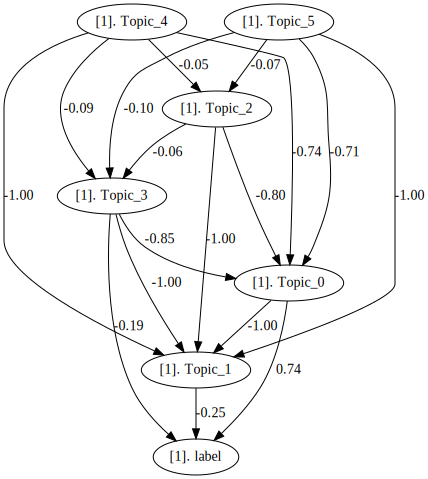

In [68]:
make_dot(model.adjacency_matrix_, labels)

In [72]:
p_values = model.get_error_independence_p_values(df_analysis)
print(p_values)

[[0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]


In [70]:
from sklearn.linear_model import LogisticRegression
target = 6 # label
features = [i for i in range(df_analysis.shape[1]) if i != target]
reg = LogisticRegression(solver='liblinear')
reg.fit(df_analysis.iloc[:, features].values, df_analysis.iloc[:, target].values)


LogisticRegression(solver='liblinear')

In [71]:
ce = lingam.CausalEffect(model)
effects = ce.estimate_effects_on_prediction(df_analysis.values, target, reg)
df_effects = pd.DataFrame()
df_effects['feature'] = df_analysis.columns
df_effects['effect_plus'] = effects[:, 0]
df_effects['effect_minus'] = effects[:, 1]
df_effects


,feature,effect_plus,effect_minus
0,Topic_0,1.245145,0.384343
1,Topic_1,0.293854,0.623316
2,Topic_2,0.042458,0.045969
3,Topic_3,0.231114,0.395548
4,Topic_4,0.001342,0.001339
5,Topic_5,0.014876,0.014488
6,label,0.000000,0.000000
